## Simple Moving Average 

In [142]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

In [143]:
enddate = datetime.date.today()

In [144]:
enddate

datetime.date(2024, 11, 17)

In [145]:
startdate = enddate - pd.Timedelta(days=50)

In [146]:
startdate

datetime.date(2024, 9, 28)

In [147]:
df = yf.download("EURUSD=X", start= startdate, end= enddate, interval="2m")

[*********************100%%**********************]  1 of 1 completed


In [148]:
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
(21177, 6)
                               Open      High       Low     Close  Adj Close  \
Datetime                                                                       
2024-10-07 01:00:00+01:00  1.097454  1.097454  1.097454  1.097454   1.097454   
2024-10-07 01:02:00+01:00  1.097333  1.097454  1.097333  1.097454   1.097454   
2024-10-07 01:04:00+01:00  1.097454  1.097454  1.097333  1.097333   1.097333   
2024-10-07 01:06:00+01:00  1.097333  1.097454  1.097333  1.097454   1.097454   
2024-10-07 01:08:00+01:00  1.097333  1.097454  1.097333  1.097454   1.097454   

                           Volume  
Datetime                           
2024-10-07 01:00:00+01:00       0  
2024-10-07 01:02:00+01:00       0  
2024-10-07 01:04:00+01:00       0  
2024-10-07 01:06:00+01:00       0  
2024-10-07 01:08:00+01:00       0  
                               Open      High       Low     Close  Adj Close  \
Datetime                                                  

In [100]:
df1a = df.copy()

<Axes: xlabel='Datetime'>

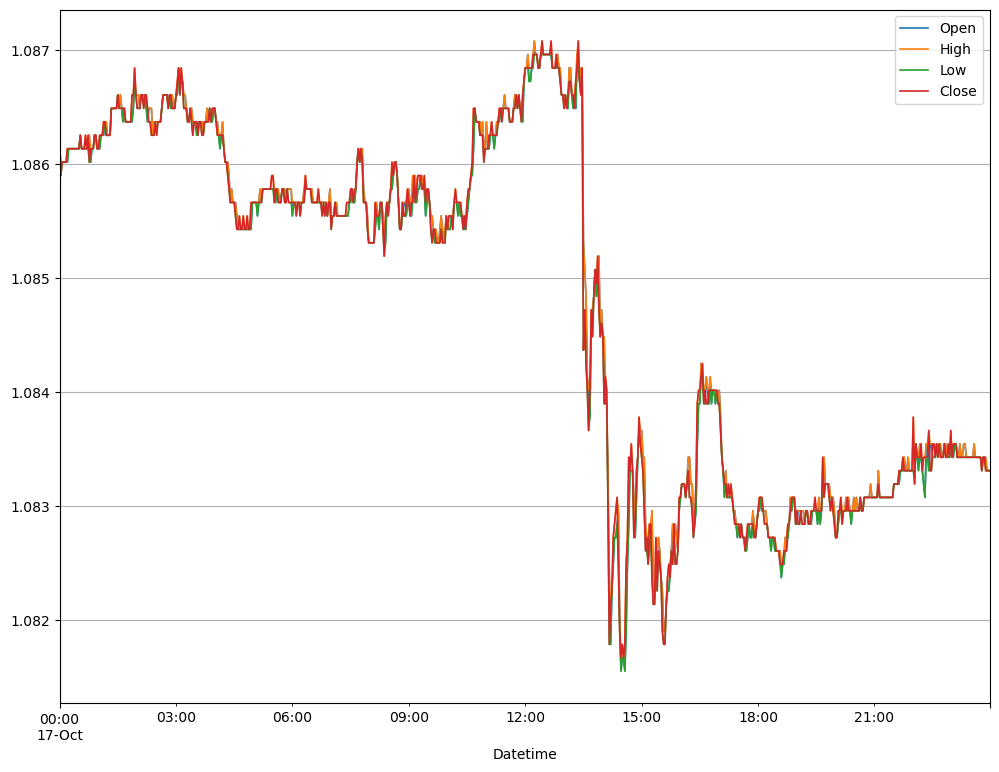

In [149]:
df1a.loc['17 October 2024',['Open','High','Low','Close']].plot(grid=True, linewidth =1.2,figsize=(12,9))

In [150]:
df1a['cc_returns'] = df1a['Close'].pct_change()

In [151]:
df1a.head()

,Open,High,Low,Close,Adj Close,Volume,cc_returns,sma,position,strategy_returns
Datetime,,,,,,,,,,
2024-10-07 01:00:00+01:00,1.097454,1.097454,1.097454,1.097454,1.097454,0,NaN,NaN,NaN,NaN
2024-10-07 01:02:00+01:00,1.097333,1.097454,1.097333,1.097454,1.097454,0,0.00000,NaN,0.0,1.0
2024-10-07 01:04:00+01:00,1.097454,1.097454,1.097333,1.097333,1.097333,0,-0.00011,NaN,0.0,1.0
2024-10-07 01:06:00+01:00,1.097333,1.097454,1.097333,1.097454,1.097454,0,0.00011,NaN,0.0,1.0
2024-10-07 01:08:00+01:00,1.097333,1.097454,1.097333,1.097454,1.097454,0,0.00000,NaN,0.0,1.0


In [152]:
sma = 30

In [153]:
df1a['sma'] = df1a['Close'].rolling(window=sma).mean()

In [154]:
print(df1a.head())
print(df1a.tail())

                               Open      High       Low     Close  Adj Close  \
Datetime                                                                       
2024-10-07 01:00:00+01:00  1.097454  1.097454  1.097454  1.097454   1.097454   
2024-10-07 01:02:00+01:00  1.097333  1.097454  1.097333  1.097454   1.097454   
2024-10-07 01:04:00+01:00  1.097454  1.097454  1.097333  1.097333   1.097333   
2024-10-07 01:06:00+01:00  1.097333  1.097454  1.097333  1.097454   1.097454   
2024-10-07 01:08:00+01:00  1.097333  1.097454  1.097333  1.097454   1.097454   

                           Volume  cc_returns  sma  position  strategy_returns  
Datetime                                                                        
2024-10-07 01:00:00+01:00       0         NaN  NaN       NaN               NaN  
2024-10-07 01:02:00+01:00       0     0.00000  NaN       0.0               1.0  
2024-10-07 01:04:00+01:00       0    -0.00011  NaN       0.0               1.0  
2024-10-07 01:06:00+01:00       0 

#### Buy > sma 30

In [155]:
df1a['position'] = np.where(df1a['Close'] > df1a['sma'],1,0)

In [156]:
df1a['position'] = df1a['position'].shift(1)

In [157]:
df1a['position'].value_counts()

position
0.0    10940
1.0    10236
Name: count, dtype: int64

In [158]:
df1a['strategy_returns'] = df1a['cc_returns'] * df1a['position']

df1a['strategy_returns'] = 1 + df1a['strategy_returns']
df1a['cc_returns'] = 1 + df1a['cc_returns']

<Axes: xlabel='Datetime'>

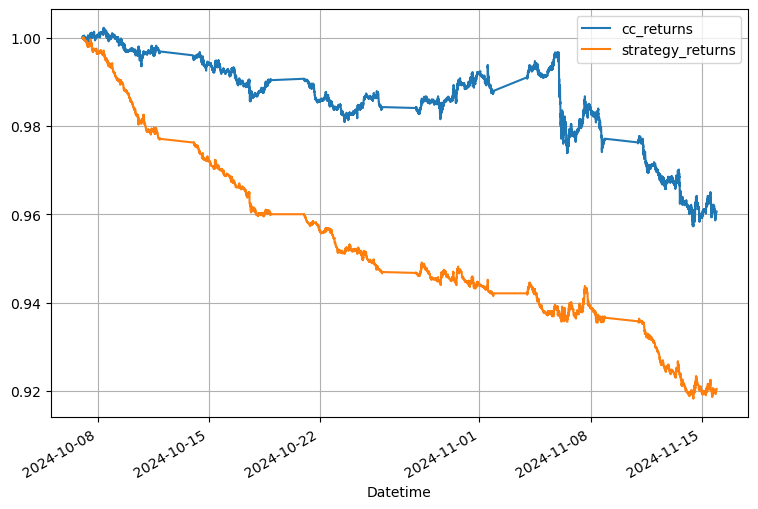

In [159]:
df1a[['cc_returns','strategy_returns']].cumprod().plot(grid = True, figsize=(9,6))

In [160]:
print('Buy and Hold returns:', np.round(df1a['cc_returns'].cumprod()[-1],2))
print('strategy returns :', np.round(df1a['strategy_returns'].cumprod()[-1],2))

Buy and Hold returns: 0.96
strategy returns : 0.92
